<a href="https://colab.research.google.com/github/amaziarczyk/Mniejsze_projekty/blob/master/Deep_learning/Zbi%C3%B3r_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [ ]:
#załadowanie zbioru mnist
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
##Sprawdzenie kształtu danych
print(f"Kształt zbioru treningowego:{x_train.shape}")
print(f"Kształt zbioru testowego:{x_test.shape}")
print(f"Klasy:{np.unique(y_train)}")

Kształt zbioru treningowego:(60000, 28, 28)
Kształt zbioru testowego:(10000, 28, 28)
Klasy:[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#liczebność klas -treningowy zbiór
classes, counts=np.unique(y_train, return_counts=True)
#liczebność klas-testowy zbiór
clas, count=np.unique(y_test, return_counts=True)

#wykres
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=classes, y=counts, name='y_train' ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=clas, y=count,name='y_test'),
    row=1, col=2
)

fig.update_xaxes(title_text="Klasa", row=1, col=1)
fig.update_xaxes(title_text="Klasa", row=1, col=2)

fig.update_layout(height=400, width=1200, title_text="Liczebność", )

fig.show()

Na zdjęciu jest: 9


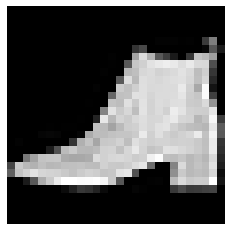

In [ ]:
#podgląd zdjęcia 
#@title Wybierz indeks zdjęcia:

#budowa slidera
n = 30022 #@param {type:'slider', min:0, max:60000}

zdjecie=x_train[n]

plt.figure(figsize=(4, 4))
plt.imshow(zdjecie)
plt.gray()
plt.axis(False)
print("Na zdjęciu jest:", y_train[n])

###Normalizacja

In [ ]:
x_train,x_test=x_train/255, x_test/255

In [ ]:
print(f"Zbior treningowy:\n Wartość najmniejsza: {x_train.min()}\n Wartość największa: {x_train.max()}\n")
print(f"Zbior testowy:\n Wartość najmniejsza: {x_test.min()}\n Wartość największa: {x_test.max()}\n")

Zbior treningowy:
 Wartość najmniejsza: 0.0
 Wartość największa: 1.0

Zbior testowy:
 Wartość najmniejsza: 0.0
 Wartość największa: 1.0



###Kodowanie-One hot encoder

In [ ]:
print("Kształt etykiet zbiory treningowego to: ",y_train.shape)
print("Kształt etykiet zbioru testowego to: ",y_test.shape)

Kształt etykiet zbiory treningowego to:  (60000,)
Kształt etykiet zbioru testowego to:  (10000,)


In [ ]:
#Należy zmienić kształt rozszerzając o jeden wymiar
y_train, y_test=y_train.reshape(-1,1), y_test.reshape(-1,1)

print("Kształt etykiet zbiory treningowego po zmianie to: ",y_train.shape)
print("Kształt etykiet zbioru testowego po zmianie to: ",y_test.shape)

Kształt etykiet zbiory treningowego po zmianie to:  (60000, 1)
Kształt etykiet zbioru testowego po zmianie to:  (10000, 1)


In [ ]:
encoder=OneHotEncoder(sparse=False)
encoder=encoder.fit(y_train)

y_train_ohe=encoder.transform(y_train)
y_test_ohe=encoder.transform(y_test)

Na zdjęciu jest: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Klasa [3]


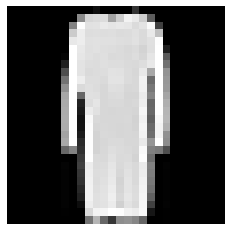

In [ ]:
#sprawdzenie
#@title Wybierz indeks zdjęcia:
#budowa slidera
n = 25 #@param {type:'slider', min:0, max:60000}

zdjecie=x_train[n]

plt.figure(figsize=(4, 4))
plt.imshow(zdjecie)
plt.gray()
plt.axis(False)
print("Na zdjęciu jest:", y_train_ohe[n])
print(f'Klasa {y_train[n]}')

###Wydzielenie zbioru walidacyjnego

In [ ]:
#wydzielenie zbioru walidacyjnego
x_train, x_val, y_train_ohe, y_val_ohe= train_test_split(x_train,
                                                 y_train_ohe,
                                                 test_size=0.1,
                                                 random_state=45)

In [ ]:
print(f"Zbiór treningowy: {x_train.shape[0]}")
print(f"Zbiór walidacyjny: {x_val.shape[0]}")

Zbiór treningowy: 54000
Zbiór walidacyjny: 6000


###Model

In [ ]:
def create_mnist_classifier(num, drop, lr, print_model=True):

  model=Sequential()
  model.add(layers.InputLayer(input_shape=(28,28)))
  model.add(layers.Reshape((784,)))

  for i in num:
     model.add(layers.Dense(units=i, activation='relu', use_bias=True))
     model.add(layers.Dropout(drop))


  model.add(layers.Dense(units=10, activation='softmax', use_bias=True))

  #drukowane modelu
  if print_model:
    print(model.summary())

  
  #kompilujemy model
  model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                loss=losses.CategoricalCrossentropy(),
                metrics= ['accuracy'])

  return model


####I model

In [ ]:
model_simple=create_mnist_classifier(
    num=[8,16,32],
    drop=0.0,
    lr=0.01
    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 6280      
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [ ]:
#trening
history=model_simple.fit(
    x=x_train,
    y=y_train_ohe,
    batch_size=200,
    epochs=50,
    validation_data=(x_val,y_val_ohe)
)

Epoch 1/50
270/270 [==============================] - 2s 4ms/step - loss: 0.6910 - accuracy: 0.7480 - val_loss: 0.5368 - val_accuracy: 0.8022
Epoch 2/50
270/270 [==============================] - 1s 3ms/step - loss: 0.4956 - accuracy: 0.8205 - val_loss: 0.4991 - val_accuracy: 0.8172
Epoch 3/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4638 - accuracy: 0.8320 - val_loss: 0.4803 - val_accuracy: 0.8228
Epoch 4/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4566 - accuracy: 0.8341 - val_loss: 0.4435 - val_accuracy: 0.8398
Epoch 5/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4427 - accuracy: 0.8389 - val_loss: 0.4505 - val_accuracy: 0.8397
Epoch 6/50
270/270 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8392 - val_loss: 0.4338 - val_accuracy: 0.8423
Epoch 7/50
270/270 [==============================] - 1s 3ms/step - loss: 0.4284 - accuracy: 0.8446 - val_loss: 0.4518 - val_accuracy: 0.8378
Epoch 

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#wykres
fig = make_subplots(rows=1, cols=2)

##strata
fig.add_trace(
    go.Scatter(y=history.history["loss"], name='Trening' ),row=1, col=1 
    )
fig.add_trace(
    go.Scatter(y=history.history["val_loss"], name='Walidacja' ),row=1, col=1
    )

##skuteczność
fig.add_trace(
    go.Scatter( y=history.history["accuracy"],name='Trening'),
    row=1, col=2
    )
fig.add_trace(
    go.Scatter(y=history.history["val_accuracy"],name='Walidacja'),
    row=1, col=2
)

fig.update_xaxes(title_text="Epoka-Strata", row=1, col=1)
fig.update_xaxes(title_text="Epoka-Skuteczność", row=1, col=2)


fig.update_layout(height=400, width=1200)

fig.show()

###Predykcja

In [ ]:
#predykcja na zbiorze treningowym
y_train_ohe_pred=model_simple.predict(
    x=x_train,
    batch_size=200
)

#buduję macierz konfuzji w celu sprawdzenia pomyłek
cm=confusion_matrix(
    y_true=np.argmax(y_train_ohe, axis=1),
    y_pred=np.argmax(y_train_ohe_pred, axis=1)
)
cm

array([[4654,    1,   90,  206,   21,    7,  412,    0,   32,    0],
       [  16, 5096,   47,  200,   25,    2,    9,    0,    4,    0],
       [  78,    1, 3787,   44, 1102,    0,  356,    0,   13,    0],
       [ 280,    9,   22, 4760,  177,    1,  128,    0,   32,    0],
       [  10,    2,  236,  225, 4603,    0,  285,    0,   21,    0],
       [   0,    0,    0,    0,    0, 5155,    2,  169,   17,   29],
       [ 979,    5,  442,  142,  627,    1, 3145,    0,   61,    0],
       [   0,    0,    0,    0,    0,  114,    0, 5179,   25,   88],
       [  17,    0,   18,   18,   25,    7,   58,    6, 5263,    0],
       [   0,    1,    0,    0,    0,  153,    0,  275,   10, 4975]])

In [ ]:
##predykcja na zbiorze walidacyjnym
y_val_ohe_pred=model_simple.predict(
    x=x_val,
    batch_size=200
)

#buduję macierz konfuzji w celu sprawdzenia pomyłek
cm_val=confusion_matrix(
    y_true=np.argmax(y_val_ohe, axis=1),
    y_pred=np.argmax(y_val_ohe_pred, axis=1)
)
cm_val

array([[475,   1,  11,  30,   4,   1,  51,   0,   4,   0],
       [  1, 568,   6,  24,   1,   0,   1,   0,   0,   0],
       [ 11,   0, 419,   7, 141,   0,  38,   0,   3,   0],
       [ 30,   1,   5, 518,  17,   0,  19,   0,   1,   0],
       [  0,   1,  28,  21, 530,   0,  33,   0,   5,   0],
       [  0,   0,   1,   0,   0, 590,   1,  24,   3,   9],
       [ 98,   1,  47,  15,  76,   0, 349,   0,  12,   0],
       [  0,   0,   0,   0,   0,  21,   0, 551,   6,  16],
       [  3,   0,   2,   0,   1,   1,  10,   1, 570,   0],
       [  0,   0,   0,   0,   0,  19,   0,  35,   3, 529]])

###Analiza jakościowa

In [ ]:
def plot_results(results, experiment_name, hiperparameter_vals):
  
  #macierz wykresów
  fig,ax=plt.subplots(
      nrows=4,
      ncols=1,
      figsize=(25,25),
      sharex=True
  )

  tmp_best_acc=0.0
  best_model=""

  #wszystkie wykresy
  for i in range(len(results)):
    ax[0].plot(results[i].history["loss"])
    ax[1].plot(results[i].history["accuracy"])
    ax[2].plot(results[i].history["val_loss"])
    ax[3].plot(results[i].history["val_accuracy"])
    tmp_acc=max(results[i].history['val_accuracy'])
    if tmp_acc>tmp_best_acc:
      tmp_best_acc=tmp_acc
      best_model=list(hiperparameter_vals.keys())[i]

    #dodajemy nazwy osi
  ax[0].set_ylabel("loss")
  ax[0].set_title("experiment: "+experiment_name+ "metric: loss")
  ax[1].set_ylabel("accuracy")
  ax[1].set_title("accuracy")
  ax[2].set_ylabel("val_loss")
  ax[2].set_title("val_loss")
  ax[3].set_ylabel("val_accuracy")
  ax[3].set_title(f"val_accuracy, best model:{best_model}, val: {tmp_best_acc:.2}")
  ax[0].legend(list(hiperparameter_vals.keys()))
  ax[3].set_xlabel("Epochs")
  plt.show()

####Zmiana wielkości modelu

In [ ]:
#stałe wartości
fixed_epochs=40
fixed_lr=0.01
fixed_drop=0.00
fixed_batch_size=200

model_sizes={
    "very_small":[8,16],
    "small":[8,16,32],
    "medium":[16,32,64],
    "big":[16,32,64,128],
    "very_big":[8,16,32,64,128,256]
}

In [ ]:
results=[]
models=[]

for key in model_sizes:
  tmp_model=create_mnist_classifier(
    num=model_sizes[key],
    drop=fixed_drop,
    lr=fixed_lr
    )
  tmp_result=tmp_model.fit(
      x=x_train,
      y=y_train_ohe,
      batch_size=fixed_batch_size,
      epochs=fixed_epochs,
      validation_data=(x_val,y_val_ohe),
      verbose=0
  )
  results.append(tmp_result)
  models.append(tmp_model)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                170       
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
____________________________________________________

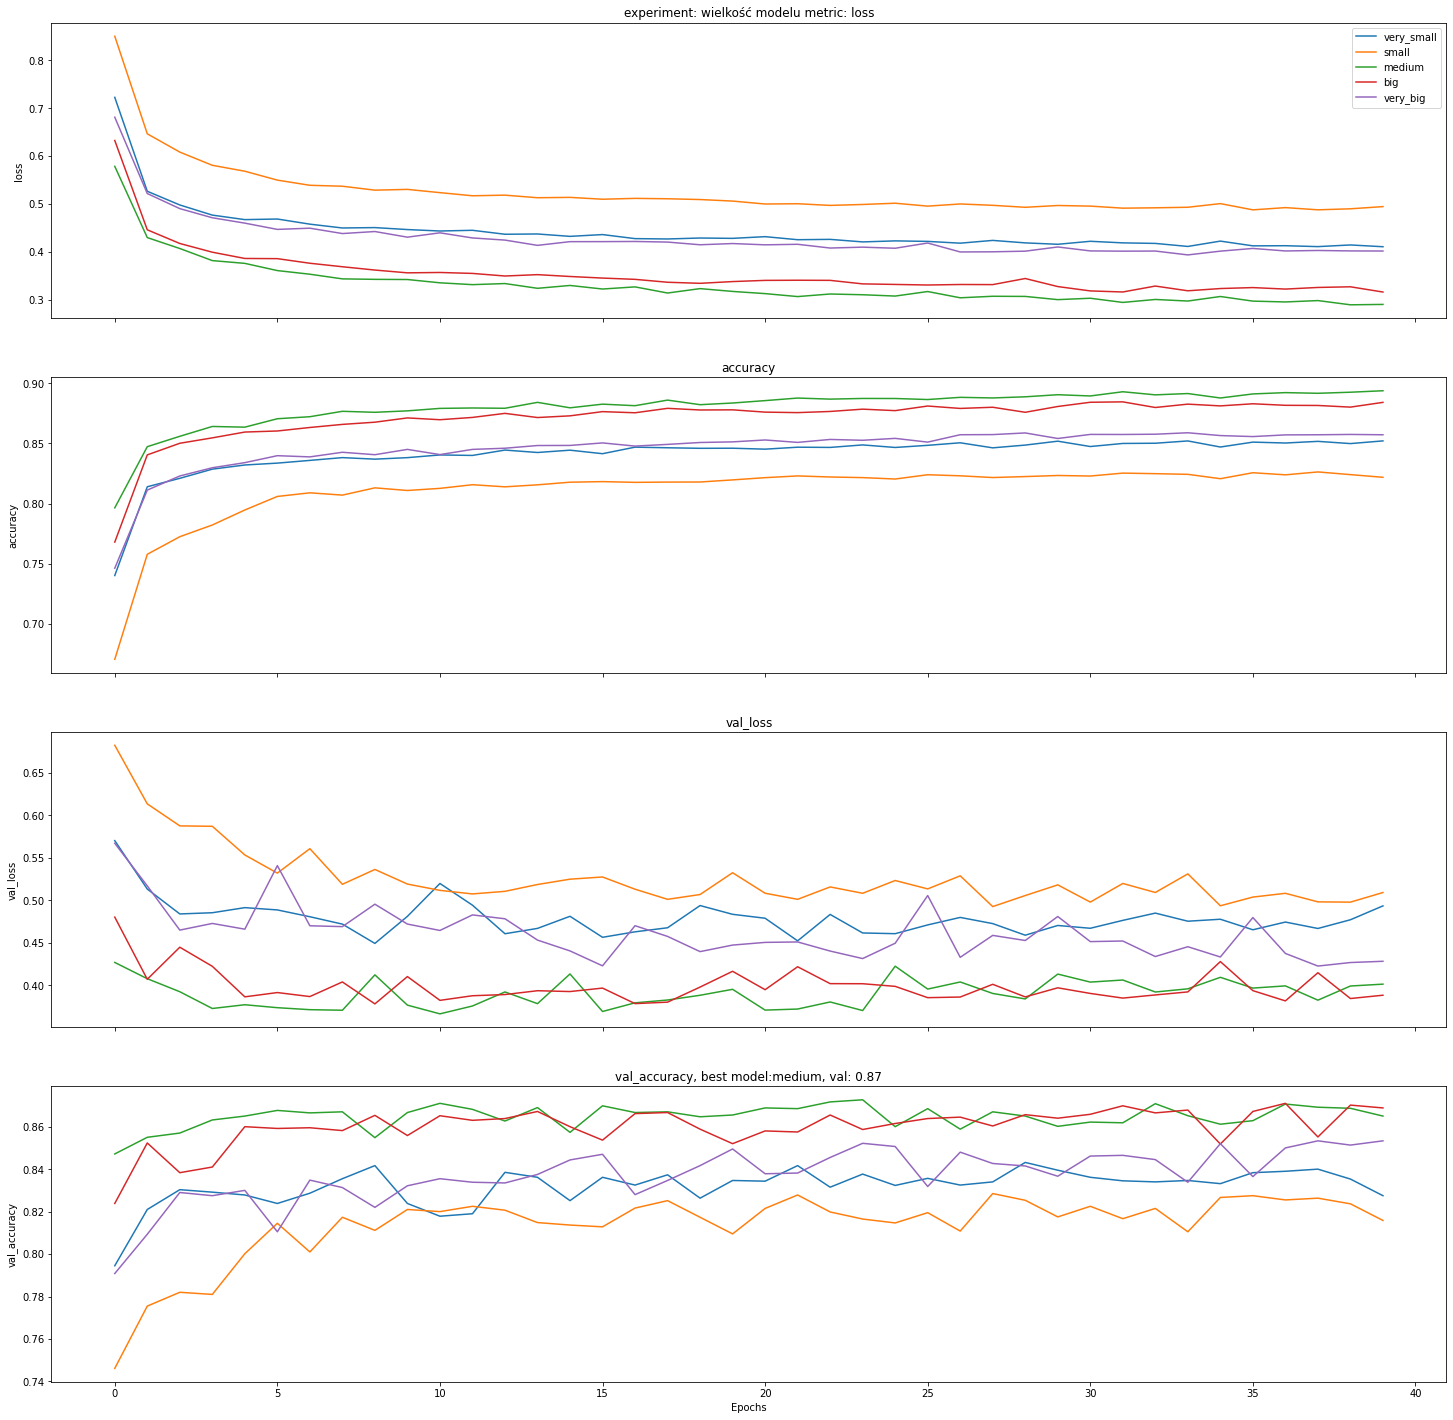

In [ ]:
#porównanie modeli
experiment_type='wielkość modelu '

plot_results(
    results=results,
    experiment_name=experiment_type,
    hiperparameter_vals=model_sizes
)

Model medium naljepszy

####Zmiana learning_rate

In [ ]:
#stałe wartości
fixed_epochs=40
fixed_drop=0.00
fixed_batch_size=200
fixed_model_size=[16,32,64]

lr_vals={
    "0.001":0.001,
    "0.01":0.01,
    "0.1":0.1,
    "1":1,
    "10":10
}

In [ ]:
results=[]
models=[]

for key in lr_vals:
  tmp_model=create_mnist_classifier(
    num=fixed_model_size,
    drop=fixed_drop,
    lr=lr_vals[key]
    )
  tmp_result=tmp_model.fit(
      x=x_train,
      y=y_train_ohe,
      batch_size=fixed_batch_size,
      epochs=fixed_epochs,
      validation_data=(x_val,y_val_ohe),
      verbose=0
  )
  results.append(tmp_result)
  models.append(tmp_model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)               

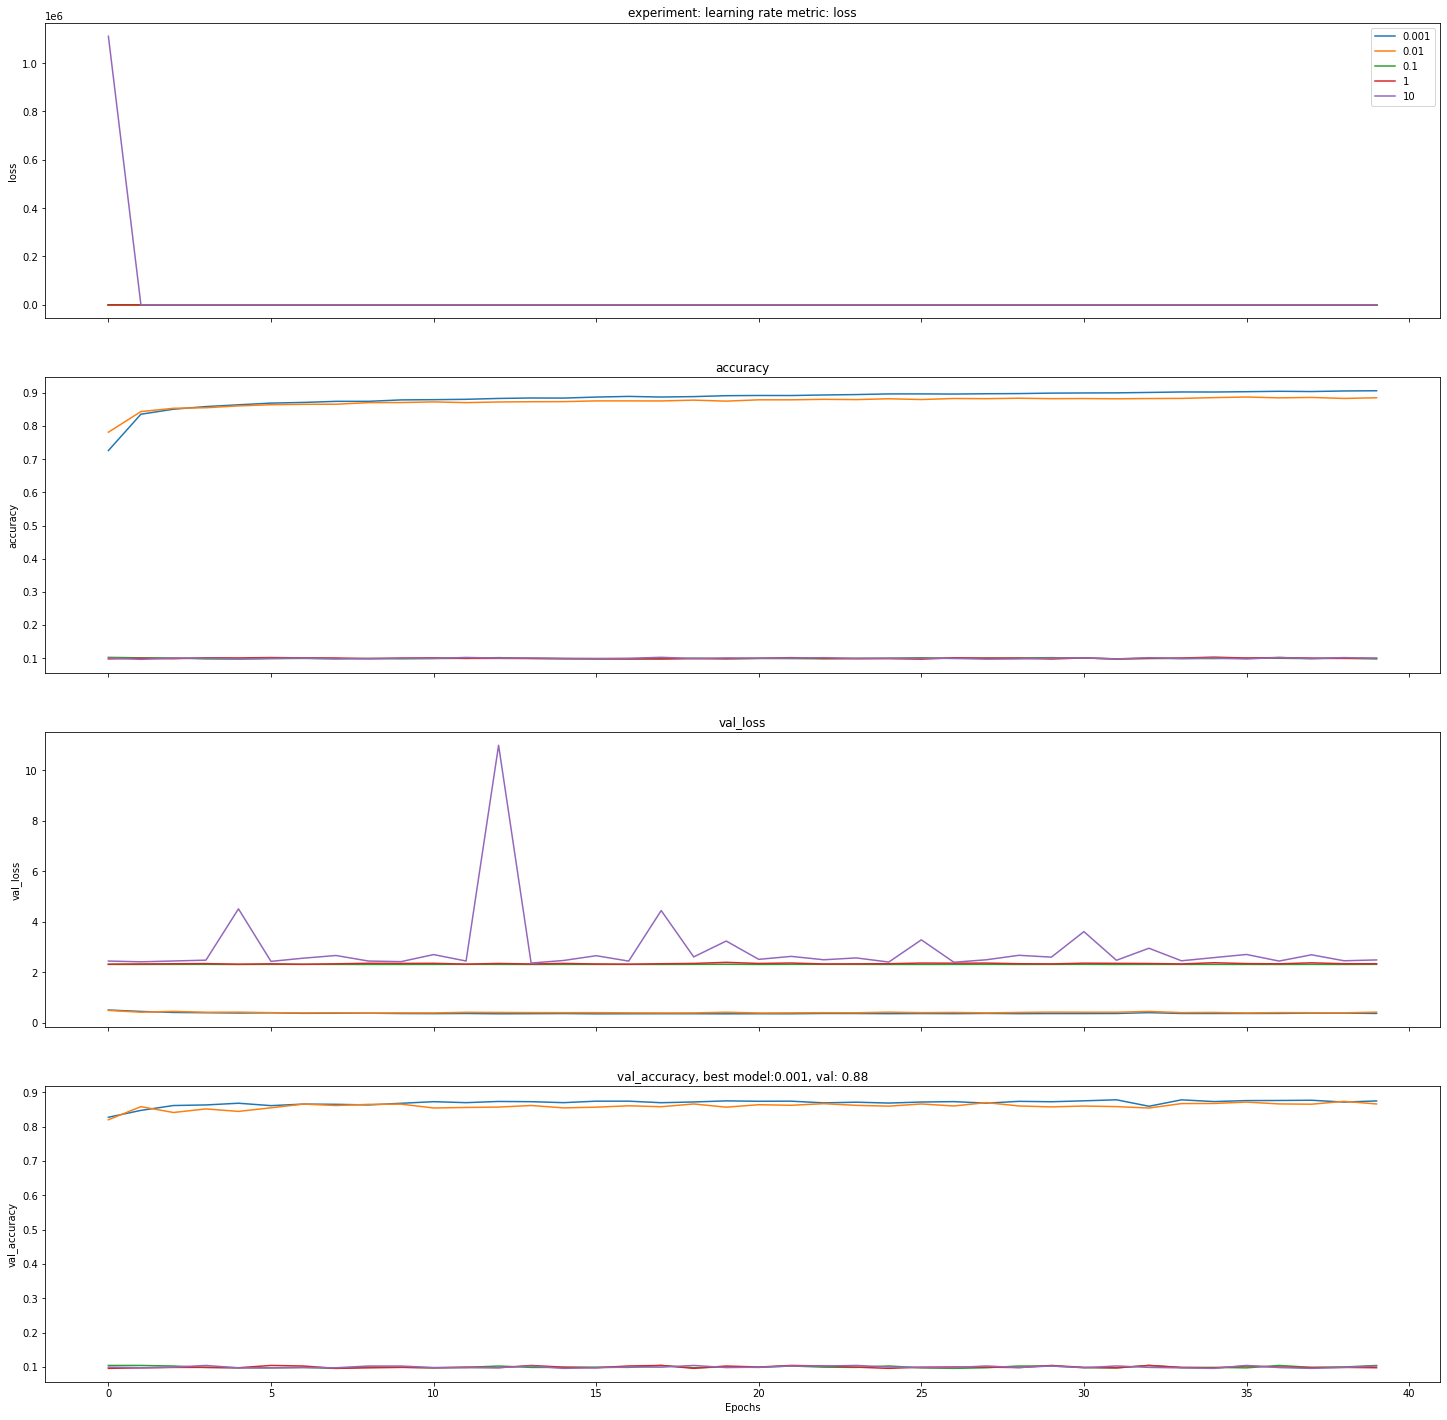

In [ ]:
#porównanie modeli
experiment_type='learning rate '

plot_results(
    results=results,
    experiment_name=experiment_type,
    hiperparameter_vals=lr_vals
)

Najlepszy : 0.001 i 0.01

####Zmiana drouout

In [ ]:
#stałe wartości
fixed_epochs=40
fixed_lr=0.01
fixed_batch_size=200
fixed_model_size=[32,64,128,256]

drop_vals={
    "0.2":0.2,
    "0.4":0.4,
    "0.6":0.6,
}


In [ ]:
results=[]
models=[]

for key in drop_vals:
  tmp_model=create_mnist_classifier(
    num=fixed_model_size,
    drop=drop_vals[key],
    lr=fixed_lr,
    print_model=False
    )
  tmp_result=tmp_model.fit(
      x=x_train,
      y=y_train_ohe,
      batch_size=fixed_batch_size,
      epochs=fixed_epochs,
      validation_data=(x_val,y_val_ohe),
      verbose=0
  )
  results.append(tmp_result)
  models.append(tmp_model)

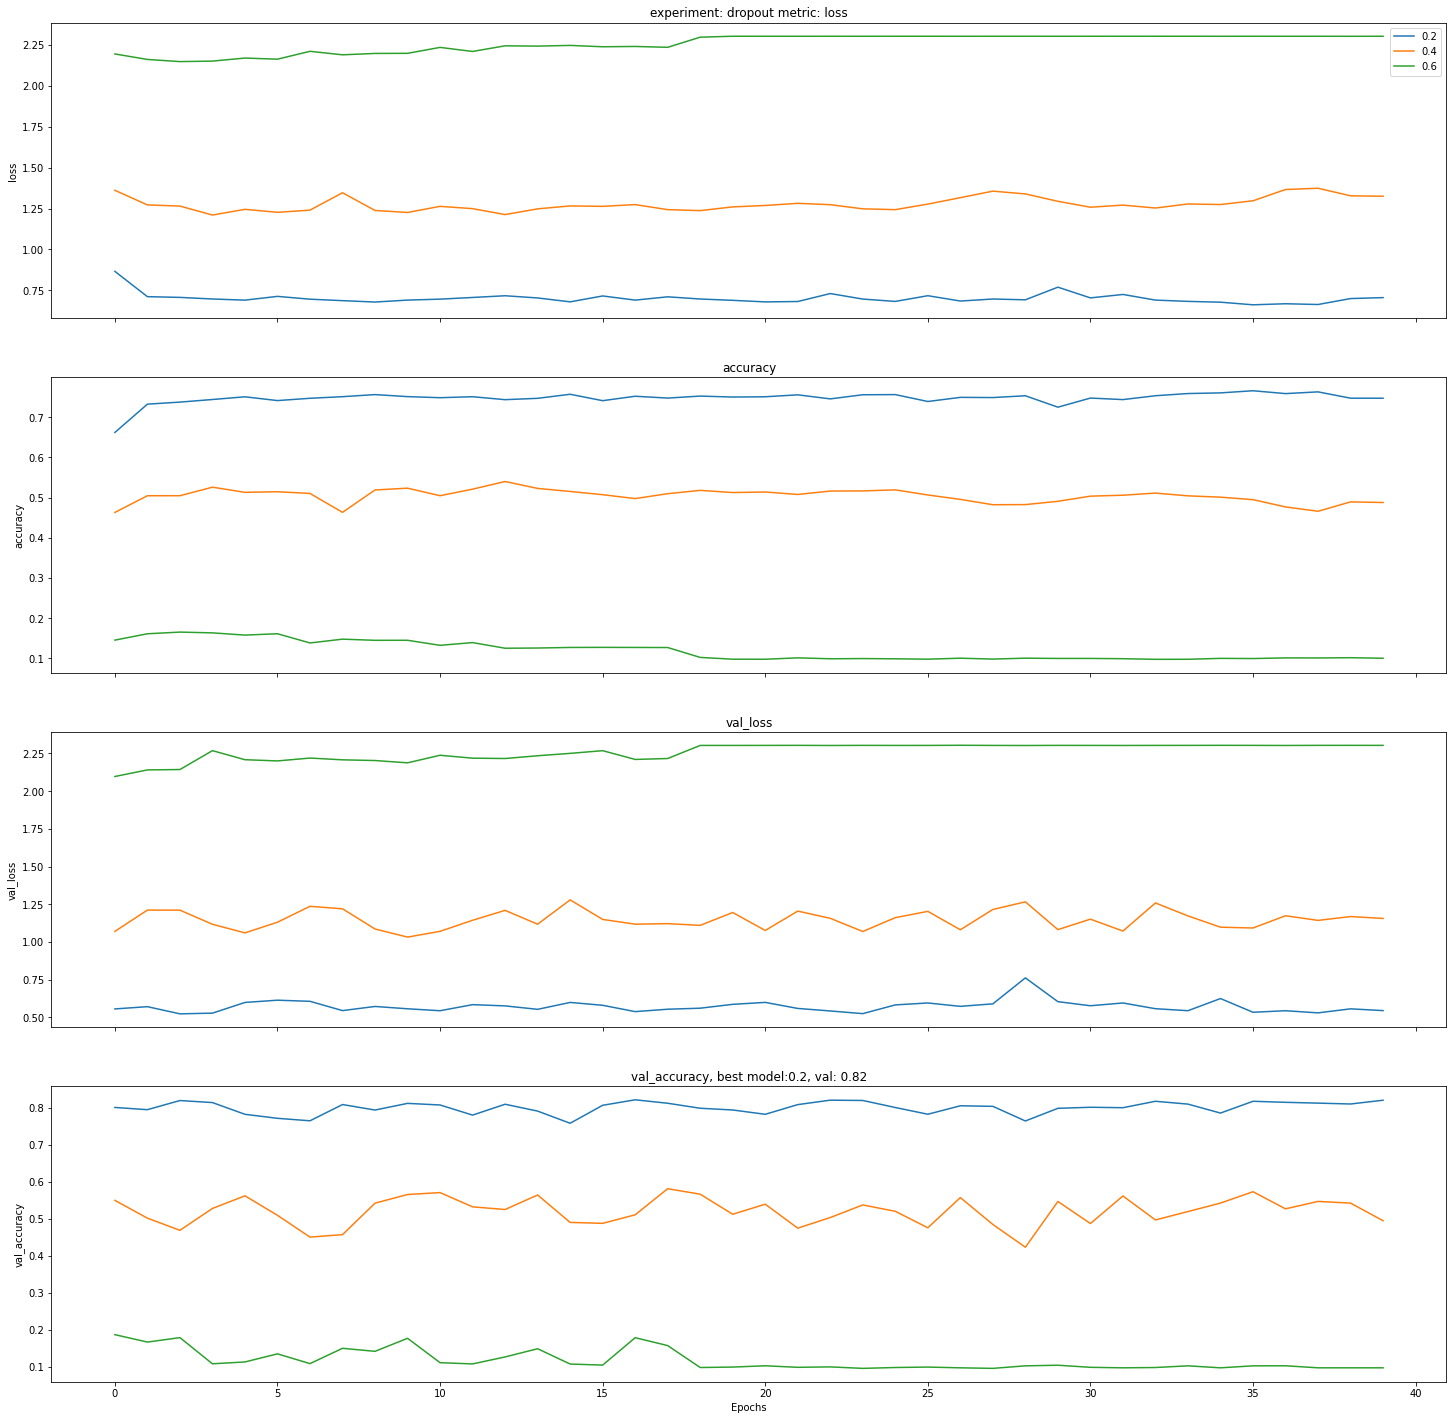

In [ ]:
#porównanie modeli
experiment_type='dropout '

plot_results(
    results=results,
    experiment_name=experiment_type,
    hiperparameter_vals=drop_vals
)

Najlepszy: 0,2